**Задача 1, 2.**

Контрольная работа состоит из пяти вопросов. На каждый вопрос приведено четыре варианта ответа, один из которых правильный. Случайная величина X задаёт число правильных ответов при простом угадывании. Найдите математическое ожидание данной случайной величины. Найдите дисперсию случайной величины X.

Подсказка: постройте закон распределения случайной величины X.

Решение: Построим закон распределения случайной величины X. Для каждого отдельного вопроса вероятность выбрать правильный ответ случайным образом равна $p = \frac{1}{4}$

In [8]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt

from numpy.ma.core import sqrt
from itertools import product

plt.style.use('seaborn-whitegrid')
%config InlineBackend.figure_formats = ['svg']

In [9]:
question = [1, 0, 0, 0]
controlwork = list(product(question, repeat=5))
print(f'Количество вариантов: {len(controlwork)}')

Количество вариантов: 1024


In [10]:
x_values = list(map(sum, controlwork))
x_unique_values = list(set(x_values))
frequence = []

for x in x_unique_values:
  frequence.append(x_values.count(x))

z = pd.DataFrame({'x': x_unique_values, 'frequence': frequence, 'probability': map(lambda x: x/len(controlwork), frequence)})
z.head(10)

,x,frequence,probability
0,0,243,0.237305
1,1,405,0.395508
2,2,270,0.263672
3,3,90,0.087891
4,4,15,0.014648
5,5,1,0.000977


In [11]:
z['probability']

0    0.237305
1    0.395508
2    0.263672
3    0.087891
4    0.014648
5    0.000977
Name: probability, dtype: float64

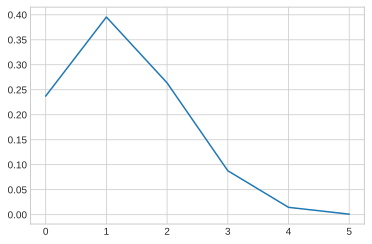

In [12]:
plt.plot(z['probability'])

Математическое ожидание можно рассчитать по формуле

$$M(X) = \displaystyle\sum_i p_i x_i = p_1 x_1 + p_2 x_2 + \dots$$

In [13]:
m = (z['x'] * z['probability']).sum()

print(f'M(X)={m}')

M(X)=1.25


Дисперсию можно вычислить по формуле

$$D(X) = M \left( (X - M(X))^2 \right).$$

In [14]:
d = ((z['x'] - m)**2 * z['probability']).sum()
print(f'D(X)={d}')

D(X)=0.9375


Ну, и среднее квадратичное отклонение $$\sigma(X) = \sqrt{D(X)}$$

In [15]:
sigma = sqrt(d)

print(f'sigma(X)={sigma}')

sigma(X)=0.9682458365518543


Ответ:
$M(X) = 1.25$;
$D(X) = 0.9375$


---

**Задача 3.**

Пользователь получает в среднем 10 писем со спамом на свой почтовый ящик за сутки. Найти число N, такое, что с вероятностью 0.95 пользователь получит не более N писем со спамом за текущий день.

Для решения задачи необходимо пользоваться распределением Пуассона с параметром  λ = 10
$$P(X \leq k) = \displaystyle\sum_{i = 0}^{k} \dfrac{\lambda^i e^{-\lambda}}{i!}$$


In [16]:
def poisson_proba(k: int, lambda_: float) -> float:
    """Формула Пуассона.
    """
    
    return (lambda_ ** k) * (np.exp(-lambda_)) / np.math.factorial(k)

In [17]:
p = 0
n = 0
while p < 0.95:
  n += 1
  p += poisson_proba(n, 10)

print(f'N={n}')

print(f'p(N-1) = {p - poisson_proba(n, 10)}')
print(f'p(N)   = {p}')
print(f'p(N+1) = {p + poisson_proba(n+1, 10)}')

N=15
p(N-1) = 0.9164961271355748
p(N)   = 0.951214196766259
p(N+1) = 0.9729129902854365


**Ответ:** 15. С вероятностью около 95% за текущий день мы получим не более **15** спам-писем.

---

**Задача 4.**

Производятся выстрелы по мишени. Вероятность попадания в мишень при одном выстреле равна 0.01. Сколько выстрелов нужно сделать чтобы быть уверенным с вероятностью 0.9, что хотя бы 6 раз будет совершено попадание?

Подсказка: 1) "Вероятность попасть k раз при n выстрелах" - на какое распределение это похоже? 2) А если нам нужна вероятность P(X >= k), а не P(X = k)? 3) Здесь предстоит немножко покодить.

Использованием формулы Бернулли.

$$P(X = k) = C_n^k p^k (1 - p)^{n - k}$$

В нашем случае p = 0.01
Вероятность попасть хотя бы 6 раз
$$P(A) = 1 - C_n^0 (1 - p)^n - C_n^1 p^1 (1 - p)^{n - 1} - C_n^2 p^2 (1 - p)^{n - 2} - C_n^3 p^3 (1 - p)^{n - 3} - C_n^4 p^4 (1 - p)^{n - 4} - C_n^5 p^5 (1 - p)^{n - 5}$$
$$P(A) = 1 - \sum_{k=0}^5 (C_n^k p^k (1 - p)^{n - k})$$

Для решения необходимо подобрать такое n, чтобы $$P(A) = 1 - \sum_{k=0}^5 (C_n^k p^k (1 - p)^{n - k}) >= 0.9$$

In [18]:
import numpy as np

def combinations(n, k):
    return np.math.factorial(n) // (np.math.factorial(k) * np.math.factorial(n - k))

def calc_probability(n, p):
    result = 1
    for k in range(6):
        result -= combinations(n, k) * p**k * (1-p)**(n-k)
    return result

n = 6
probability = calc_probability(n, 0.01)
while probability < 0.9:
    n += 1
    probability = calc_probability(n, 0.01)
    if n % 50 == 0:
      print(n, probability)  

print(f'Для уверенности с вероятностью {probability}, что попаданий не меньше 6 нужно сделать {n} выстрелов')

50 1.0896832027024194e-05
100 0.0005345344639939185
150 0.0042112322198926775
200 0.01602290690917927
250 0.0411831840698504
300 0.08290356328426318
350 0.1413873564317708
400 0.2140809214989603
450 0.29663768988267497
500 0.38403786817855007
550 0.4715116626667904
600 0.5551279698323172
650 0.6320557183646343
700 0.7005756236204642
750 0.759937185431987
800 0.810143551899295
850 0.851723596249975
900 0.885526999042219
Для уверенности с вероятностью 0.9003627121531355, что попаданий не меньше 6 нужно сделать 926 выстрелов


Ответ: 926